***Классическое машинное обучение***

*Курсовая работа (vo_PJ)*

*Исследование лекарственной активности*

*Целевыми переменными являются:*
- *IC50* - используется для определения минимальной ингибирующей концентрации для подавления 50% возбудителя
- *CC50* - цитотоксическая концентрация экстрактов, вызывающая гибель 50% жизнеспособных клеток в организме хозяина
- *SI* - отношение СС50 к IC50 - терапевтический индекс

# Загрузка данных:

In [1]:
from scipy.stats import mannwhitneyu
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import probplot, shapiro, anderson
import dtale

In [2]:
# url ='https://lms.skillfactory.ru/asset-v1:SkillFactory+MIFIML-2sem+2025+type@asset+block@%D0%94%D0%B0%D0%BD%D0%BD%D1%8B%D0%B5_%D0%B4%D0%BB%D1%8F_%D0%BA%D1%83%D1%80%D1%81%D0%BE%D0%B2%D0%BE%D0%B8__%D0%9A%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5_%D0%9C%D0%9E.xlsx'

In [3]:
# df =pd.read_excel(url)

In [4]:
df = pd.read_excel('Данные_для_курсовои_Классическое_МО.xlsx', index_col=0)

In [5]:
df.shape

(1001, 213)

In [6]:
df.head()

IC50, mM    CC50, mM         SI  MaxAbsEStateIndex  MaxEStateIndex  \
0    6.239374  175.482382  28.125000           5.094096        5.094096   
1    0.771831    5.402819   7.000000           3.961417        3.961417   
2  223.808778  161.142320   0.720000           2.627117        2.627117   
3    1.705624  107.855654  63.235294           5.097360        5.097360   
4  107.131532  139.270991   1.300000           5.150510        5.150510   

   MinAbsEStateIndex  MinEStateIndex       qed        SPS    MolWt  ...  \
0           0.387225        0.387225  0.417362  42.928571  384.652  ...   
1           0.533868        0.533868  0.462473  45.214286  388.684  ...   
2           0.543231        0.543231  0.260923  42.187500  446.808  ...   
3           0.390603        0.390603  0.377846  41.862069  398.679  ...   
4           0.270476        0.270476  0.429038  36.514286  466.713  ...   

   fr_sulfide  fr_sulfonamd  fr_sulfone  fr_term_acetylene  fr_tetrazole  \
0           0             0           0                  0             0   
1           0             0           0                  0             0   
2           0             0           0                  0             0   
3           0             0           0                  0             0   
4           0             0           0                  0             0   

   fr_thiazole  fr_thiocyan  fr_thiophene  fr_unbrch_alkane  fr_urea  
0            0            0             0                 3        0  
1            0            0             0                 3        0  
2            0            0             0                 3        0  
3            0            0             0                 4        0  
4            0            0             0                 0        0  

[5 rows x 213 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1001 entries, 0 to 1000
Columns: 213 entries, IC50, mM to fr_urea
dtypes: float64(107), int64(106)
memory usage: 1.6 MB


In [8]:
# Проверка типов данных
df.dtypes

IC50, mM             float64
CC50, mM             float64
SI                   float64
MaxAbsEStateIndex    float64
MaxEStateIndex       float64
                      ...   
fr_thiazole            int64
fr_thiocyan            int64
fr_thiophene           int64
fr_unbrch_alkane       int64
fr_urea                int64
Length: 213, dtype: object

In [9]:
dub = df.duplicated().sum()# количество дубликатов
print(dub)
df = df.drop_duplicates()# сразу почистили
df.shape

32


(969, 213)

In [10]:
df.shape

(969, 213)

In [11]:
# Поиск нечисловых столбцов
non_numeric_cols = df.select_dtypes(exclude=['float64', 'int64']).columns
print("Не числовые столбцы:", non_numeric_cols)

Не числовые столбцы: Index([], dtype='object')


In [12]:
# Получение описания, включая все типы
df.describe(include='all')

IC50, mM     CC50, mM            SI  MaxAbsEStateIndex  \
count   969.000000   969.000000    969.000000         969.000000   
mean    220.726223   586.419908     73.967907          10.893712   
std     397.172441   633.624464    695.564665           3.284005   
min       0.003517     0.700808      0.011489           2.321942   
25%      12.515396    99.999345      1.488095          10.006389   
50%      45.338355   424.166213      3.900000          12.196496   
75%     231.373089   891.776925     16.375000          13.178870   
max    4128.529377  4538.976189  15620.600000          15.933463   

       MaxEStateIndex  MinAbsEStateIndex  MinEStateIndex         qed  \
count      969.000000         969.000000      969.000000  969.000000   
mean        10.893712           0.179533       -0.960140    0.577633   
std          3.284005           0.168928        1.567568    0.213316   
min          2.321942           0.000039       -6.992796    0.059567   
25%         10.006389           0.050979       -1.333174    0.442842   
50%         12.196496           0.123850       -0.419485    0.634372   
75%         13.178870           0.291020        0.007873    0.742483   
max         15.933463           1.374614        1.374614    0.947265   

              SPS       MolWt  ...  fr_sulfide  fr_sulfonamd  fr_sulfone  \
count  969.000000  969.000000  ...  969.000000    969.000000  969.000000   
mean    29.370350  351.486139  ...    0.055728      0.012384    0.009288   
std     12.605779  127.388186  ...    0.263069      0.110649    0.095975   
min      9.416667  110.156000  ...    0.000000      0.000000    0.000000   
25%     18.500000  266.252000  ...    0.000000      0.000000    0.000000   
50%     29.200000  318.373000  ...    0.000000      0.000000    0.000000   
75%     38.600000  413.670000  ...    0.000000      0.000000    0.000000   
max     60.272727  904.777000  ...    2.000000      1.000000    1.000000   

       fr_term_acetylene  fr_tetrazole  fr_thiazole  fr_thiocyan  \
count         969.000000    969.000000   969.000000        969.0   
mean            0.001032      0.001032     0.053664          0.0   
std             0.032125      0.032125     0.225469          0.0   
min             0.000000      0.000000     0.000000          0.0   
25%             0.000000      0.000000     0.000000          0.0   
50%             0.000000      0.000000     0.000000          0.0   
75%             0.000000      0.000000     0.000000          0.0   
max             1.000000      1.000000     1.000000          0.0   

       fr_thiophene  fr_unbrch_alkane     fr_urea  
count    969.000000        969.000000  969.000000  
mean       0.070175          0.208462    0.007224  
std        0.255574          1.231428    0.084730  
min        0.000000          0.000000    0.000000  
25%        0.000000          0.000000    0.000000  
50%        0.000000          0.000000    0.000000  
75%        0.000000          0.000000    0.000000  
max        1.000000         20.000000    1.000000  

[8 rows x 213 columns]

In [13]:
df.describe()

IC50, mM     CC50, mM            SI  MaxAbsEStateIndex  \
count   969.000000   969.000000    969.000000         969.000000   
mean    220.726223   586.419908     73.967907          10.893712   
std     397.172441   633.624464    695.564665           3.284005   
min       0.003517     0.700808      0.011489           2.321942   
25%      12.515396    99.999345      1.488095          10.006389   
50%      45.338355   424.166213      3.900000          12.196496   
75%     231.373089   891.776925     16.375000          13.178870   
max    4128.529377  4538.976189  15620.600000          15.933463   

       MaxEStateIndex  MinAbsEStateIndex  MinEStateIndex         qed  \
count      969.000000         969.000000      969.000000  969.000000   
mean        10.893712           0.179533       -0.960140    0.577633   
std          3.284005           0.168928        1.567568    0.213316   
min          2.321942           0.000039       -6.992796    0.059567   
25%         10.006389           0.050979       -1.333174    0.442842   
50%         12.196496           0.123850       -0.419485    0.634372   
75%         13.178870           0.291020        0.007873    0.742483   
max         15.933463           1.374614        1.374614    0.947265   

              SPS       MolWt  ...  fr_sulfide  fr_sulfonamd  fr_sulfone  \
count  969.000000  969.000000  ...  969.000000    969.000000  969.000000   
mean    29.370350  351.486139  ...    0.055728      0.012384    0.009288   
std     12.605779  127.388186  ...    0.263069      0.110649    0.095975   
min      9.416667  110.156000  ...    0.000000      0.000000    0.000000   
25%     18.500000  266.252000  ...    0.000000      0.000000    0.000000   
50%     29.200000  318.373000  ...    0.000000      0.000000    0.000000   
75%     38.600000  413.670000  ...    0.000000      0.000000    0.000000   
max     60.272727  904.777000  ...    2.000000      1.000000    1.000000   

       fr_term_acetylene  fr_tetrazole  fr_thiazole  fr_thiocyan  \
count         969.000000    969.000000   969.000000        969.0   
mean            0.001032      0.001032     0.053664          0.0   
std             0.032125      0.032125     0.225469          0.0   
min             0.000000      0.000000     0.000000          0.0   
25%             0.000000      0.000000     0.000000          0.0   
50%             0.000000      0.000000     0.000000          0.0   
75%             0.000000      0.000000     0.000000          0.0   
max             1.000000      1.000000     1.000000          0.0   

       fr_thiophene  fr_unbrch_alkane     fr_urea  
count    969.000000        969.000000  969.000000  
mean       0.070175          0.208462    0.007224  
std        0.255574          1.231428    0.084730  
min        0.000000          0.000000    0.000000  
25%        0.000000          0.000000    0.000000  
50%        0.000000          0.000000    0.000000  
75%        0.000000          0.000000    0.000000  
max        1.000000         20.000000    1.000000  

[8 rows x 213 columns]

In [14]:
# Замена имен столбцов
df = df.rename(columns={
    'IC50, mM': 'IC50',
    'CC50, mM': 'CC50'
})

In [15]:
df.shape

(969, 213)

In [16]:
print("Доступные колонки:")
for col in df.columns:
    print(col)

Доступные колонки:
IC50
CC50
SI
MaxAbsEStateIndex
MaxEStateIndex
MinAbsEStateIndex
MinEStateIndex
qed
SPS
MolWt
HeavyAtomMolWt
ExactMolWt
NumValenceElectrons
NumRadicalElectrons
MaxPartialCharge
MinPartialCharge
MaxAbsPartialCharge
MinAbsPartialCharge
FpDensityMorgan1
FpDensityMorgan2
FpDensityMorgan3
BCUT2D_MWHI
BCUT2D_MWLOW
BCUT2D_CHGHI
BCUT2D_CHGLO
BCUT2D_LOGPHI
BCUT2D_LOGPLOW
BCUT2D_MRHI
BCUT2D_MRLOW
AvgIpc
BalabanJ
BertzCT
Chi0
Chi0n
Chi0v
Chi1
Chi1n
Chi1v
Chi2n
Chi2v
Chi3n
Chi3v
Chi4n
Chi4v
HallKierAlpha
Ipc
Kappa1
Kappa2
Kappa3
LabuteASA
PEOE_VSA1
PEOE_VSA10
PEOE_VSA11
PEOE_VSA12
PEOE_VSA13
PEOE_VSA14
PEOE_VSA2
PEOE_VSA3
PEOE_VSA4
PEOE_VSA5
PEOE_VSA6
PEOE_VSA7
PEOE_VSA8
PEOE_VSA9
SMR_VSA1
SMR_VSA10
SMR_VSA2
SMR_VSA3
SMR_VSA4
SMR_VSA5
SMR_VSA6
SMR_VSA7
SMR_VSA8
SMR_VSA9
SlogP_VSA1
SlogP_VSA10
SlogP_VSA11
SlogP_VSA12
SlogP_VSA2
SlogP_VSA3
SlogP_VSA4
SlogP_VSA5
SlogP_VSA6
SlogP_VSA7
SlogP_VSA8
SlogP_VSA9
TPSA
EState_VSA1
EState_VSA10
EState_VSA11
EState_VSA2
EState_VSA3
EState_VSA4

In [17]:
print(df.dtypes)

# Вывод колонок с категориальным типом
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("\nКатегориальные колонки:")
print(categorical_columns)

# Вывод колонок с числовым типом
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
print("\nЧисловые колонки:")
print(numerical_columns)

IC50                 float64
CC50                 float64
SI                   float64
MaxAbsEStateIndex    float64
MaxEStateIndex       float64
                      ...   
fr_thiazole            int64
fr_thiocyan            int64
fr_thiophene           int64
fr_unbrch_alkane       int64
fr_urea                int64
Length: 213, dtype: object

Категориальные колонки:
[]

Числовые колонки:
['IC50', 'CC50', 'SI', 'MaxAbsEStateIndex', 'MaxEStateIndex', 'MinAbsEStateIndex', 'MinEStateIndex', 'qed', 'SPS', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons', 'NumRadicalElectrons', 'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW', 'AvgIpc', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 

In [18]:
def get_numeric_col_stats(col):
    """Возвращает статистику для числового столбца."""
    return {
        'total_count': len(col),
        'zero_count': (col == 0).sum(),
        'nan_count': col.isna().sum(),
        'dtype': str(col.dtype),
        'mean': col.mean(),
        'std': col.std(),
        'min': col.min(),
        'max': col.max(),
        'median': col.median()
    }

def get_zero_columns_info(df):
    """Возвращает информацию о столбцах, состоящих только из нулей."""
    zero_cols_info = {}

    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            # Проверка на наличие ненулевых значений
            if (df[col].fillna(0) == 0).all():
                stats = get_numeric_col_stats(df[col])
                stats['name'] = col
                stats['all_zero'] = True
                zero_cols_info[col] = stats

    return zero_cols_info

if __name__ == '__main__':
    # Замените следующий код на загрузку вашего DataFrame
    # df = pd.read_csv('your_file.csv')  
    zero_cols_info = get_zero_columns_info(df)

    # Выводим результаты
    print("Нулевые столбцы:")
    for name, info in zero_cols_info.items():
        print(f"\nСтолбец '{name}':")
        for k, v in info.items():
            print(f"  {k}: {v}")

Нулевые столбцы:

Столбец 'NumRadicalElectrons':
  total_count: 969
  zero_count: 969
  nan_count: 0
  dtype: int64
  mean: 0.0
  std: 0.0
  min: 0
  max: 0
  median: 0.0
  name: NumRadicalElectrons
  all_zero: True

Столбец 'SMR_VSA8':
  total_count: 969
  zero_count: 969
  nan_count: 0
  dtype: int64
  mean: 0.0
  std: 0.0
  min: 0
  max: 0
  median: 0.0
  name: SMR_VSA8
  all_zero: True

Столбец 'SlogP_VSA9':
  total_count: 969
  zero_count: 969
  nan_count: 0
  dtype: int64
  mean: 0.0
  std: 0.0
  min: 0
  max: 0
  median: 0.0
  name: SlogP_VSA9
  all_zero: True

Столбец 'fr_N_O':
  total_count: 969
  zero_count: 969
  nan_count: 0
  dtype: int64
  mean: 0.0
  std: 0.0
  min: 0
  max: 0
  median: 0.0
  name: fr_N_O
  all_zero: True

Столбец 'fr_SH':
  total_count: 969
  zero_count: 969
  nan_count: 0
  dtype: int64
  mean: 0.0
  std: 0.0
  min: 0
  max: 0
  median: 0.0
  name: fr_SH
  all_zero: True

Столбец 'fr_azide':
  total_count: 969
  zero_count: 969
  nan_count: 0
  dtype: 

In [19]:
# Удаление нулевых столбцов из исходного датафрейма
df = df.drop(columns=list(zero_cols_info.keys()))

# Вывод результата
print("\nОчищенный датафрейм (первые 5 строк):")
print(df.head())


Очищенный датафрейм (первые 5 строк):
         IC50        CC50         SI  MaxAbsEStateIndex  MaxEStateIndex  \
0    6.239374  175.482382  28.125000           5.094096        5.094096   
1    0.771831    5.402819   7.000000           3.961417        3.961417   
2  223.808778  161.142320   0.720000           2.627117        2.627117   
3    1.705624  107.855654  63.235294           5.097360        5.097360   
4  107.131532  139.270991   1.300000           5.150510        5.150510   

   MinAbsEStateIndex  MinEStateIndex       qed        SPS    MolWt  ...  \
0           0.387225        0.387225  0.417362  42.928571  384.652  ...   
1           0.533868        0.533868  0.462473  45.214286  388.684  ...   
2           0.543231        0.543231  0.260923  42.187500  446.808  ...   
3           0.390603        0.390603  0.377846  41.862069  398.679  ...   
4           0.270476        0.270476  0.429038  36.514286  466.713  ...   

   fr_quatN  fr_sulfide  fr_sulfonamd  fr_sulfone  fr_term_

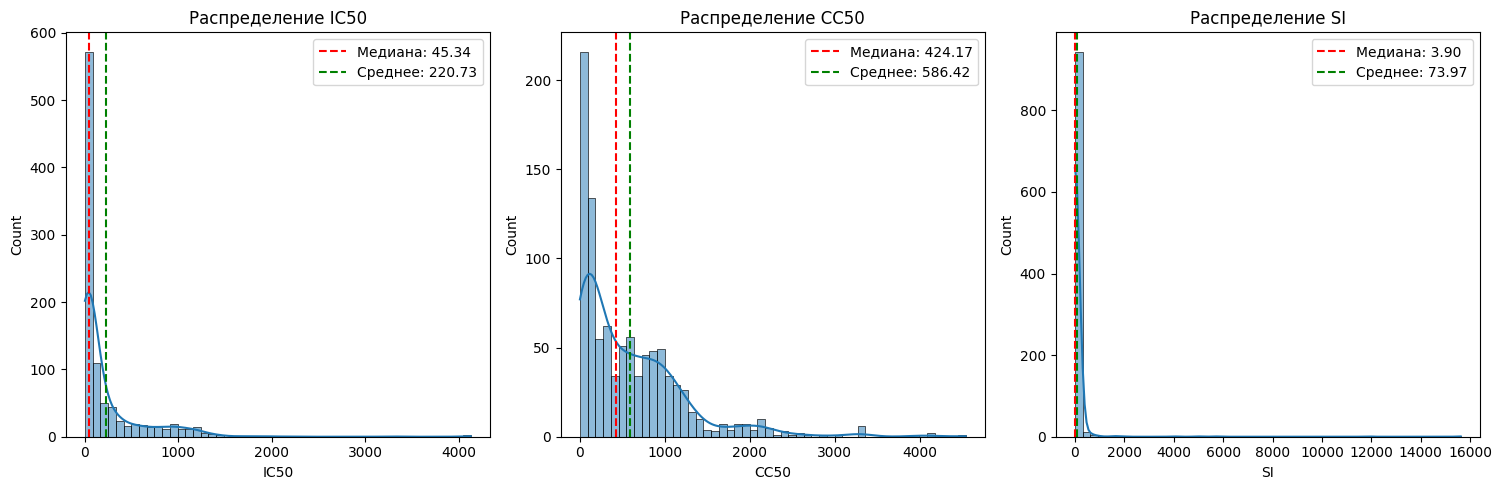

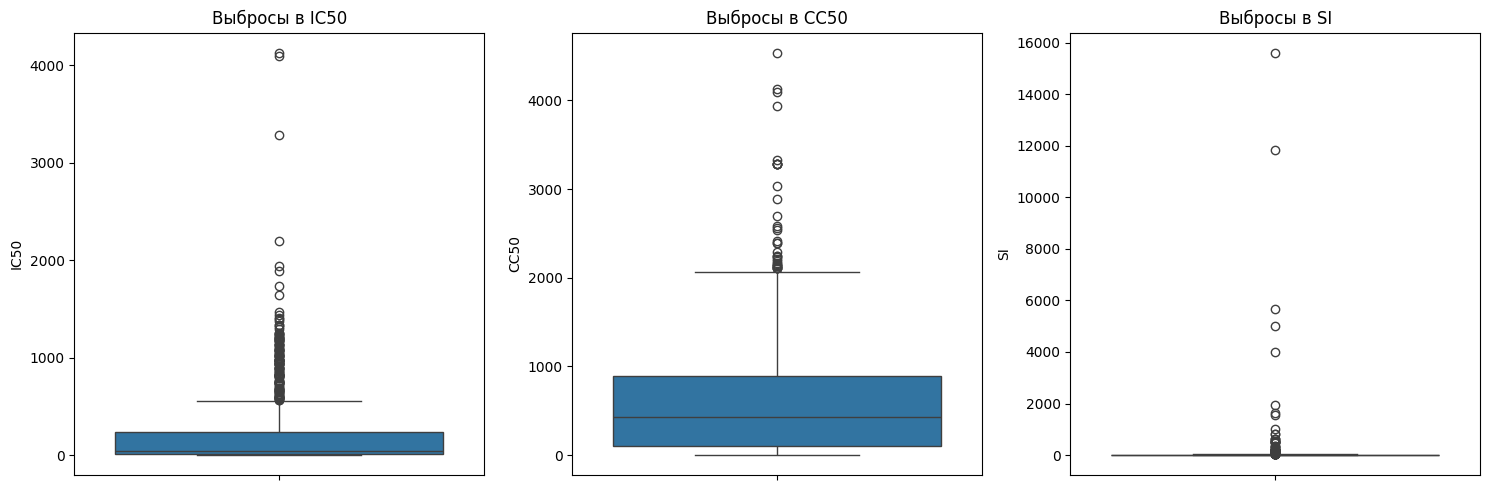

In [20]:
def plot_histograms(df, cols):
    """Функция для построения гистограмм с KDE и линиями медианы и среднего."""
    plt.figure(figsize=(15, 5))
    
    for i, col in enumerate(cols, 1):
        plt.subplot(1, len(cols), i)
        sns.histplot(df[col], kde=True, bins=50)
        plt.title(f'Распределение {col}')
        
        # Отображение медианы и среднего
        median = df[col].median()
        mean = df[col].mean()
        plt.axvline(median, color='red', linestyle='--', label=f'Медиана: {median:.2f}')
        plt.axvline(mean, color='green', linestyle='--', label=f'Среднее: {mean:.2f}')
        plt.legend()

    plt.tight_layout()
    plt.show()

def plot_boxplots(df, cols):
    """Функция для построения боксплотов для визуализации выбросов."""
    plt.figure(figsize=(15, 5))
    
    for i, col in enumerate(cols, 1):
        plt.subplot(1, len(cols), i)
        sns.boxplot(y=df[col])
        plt.title(f'Выбросы в {col}')

    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    
    target_columns = ['IC50', 'CC50', 'SI']
    
    plot_histograms(df, target_columns)  # Построение гистограмм
    plot_boxplots(df, target_columns)     # Построение боксплотов

- **Вывод:**
- IC50, CC50, SI характеризуются правосторонней асимметрией распределений с экстремальными значениями (особенно выражено для SI).
- Медиана < Среднего во всех случаях, что указывает на влияние длинных хвостов распределения. В случае с другими признаками мы сочлимы двнные особенности за выбросы,но поскольк мы имеем дело с целевыми переменными то будем относится к ним как важным особенностям.

In [21]:
# Убедимся, что в таргетах нет пропусков
target_columns = ["IC50", "CC50", "SI"]
print(df[target_columns].isnull().sum())

IC50    0
CC50    0
SI      0
dtype: int64


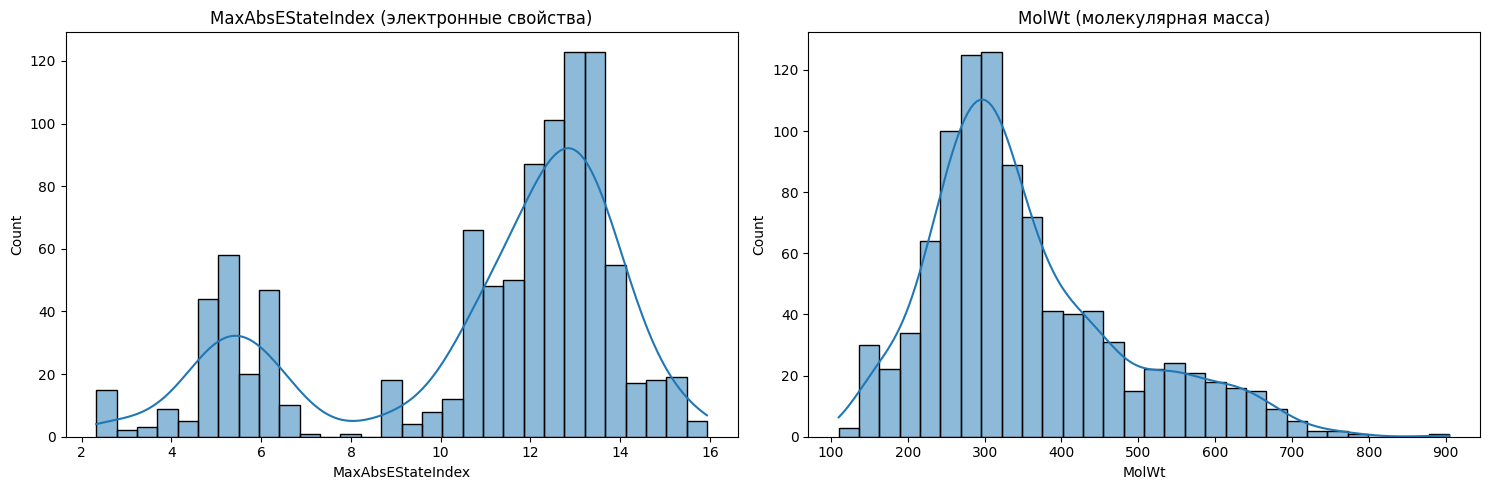

In [22]:
def plot_property_histogram(df, property_name, title, position):
    """Функция для построения гистограммы с KDE для заданного свойства."""
    plt.subplot(1, 2, position)  # position - это номер подграфика (1 или 2)
    sns.histplot(df[property_name], kde=True, bins=30)
    plt.title(title)

if __name__ == '__main__':
    plt.figure(figsize=(15, 5))
    
    # Построение гистограмм для свойств
    plot_property_histogram(df, 'MaxAbsEStateIndex', 'MaxAbsEStateIndex (электронные свойства)', 1)
    plot_property_histogram(df, 'MolWt', 'MolWt (молекулярная масса)', 2)

    plt.tight_layout()
    plt.show()

## Выводы по анализу свойств молекул

### 1. MaxAbsEStateIndex (электронные свойства)
- **Распределение:** 
  - Близко к нормальному с небольшим смещением вправо.
  - Большинство значений сосредоточены в диапазоне от 8 до 15.
  - Наблюдаются редкие выбросы, достигающие 16.

### 2. MolWt (молекулярная масса)
- **Распределение:** 
  - Близко к нормальному распределению с явным пиком в диапазоне 300–400.
  - Длинный правый хвост указывает на наличие молекул с высокой массой (более 700).

### Рекомендации
- **Стандартизация/нормализация:** 
  - Для моделей, чувствительных к масштабу (например, линейные модели), требуется применение методов стандартизации или нормализации.

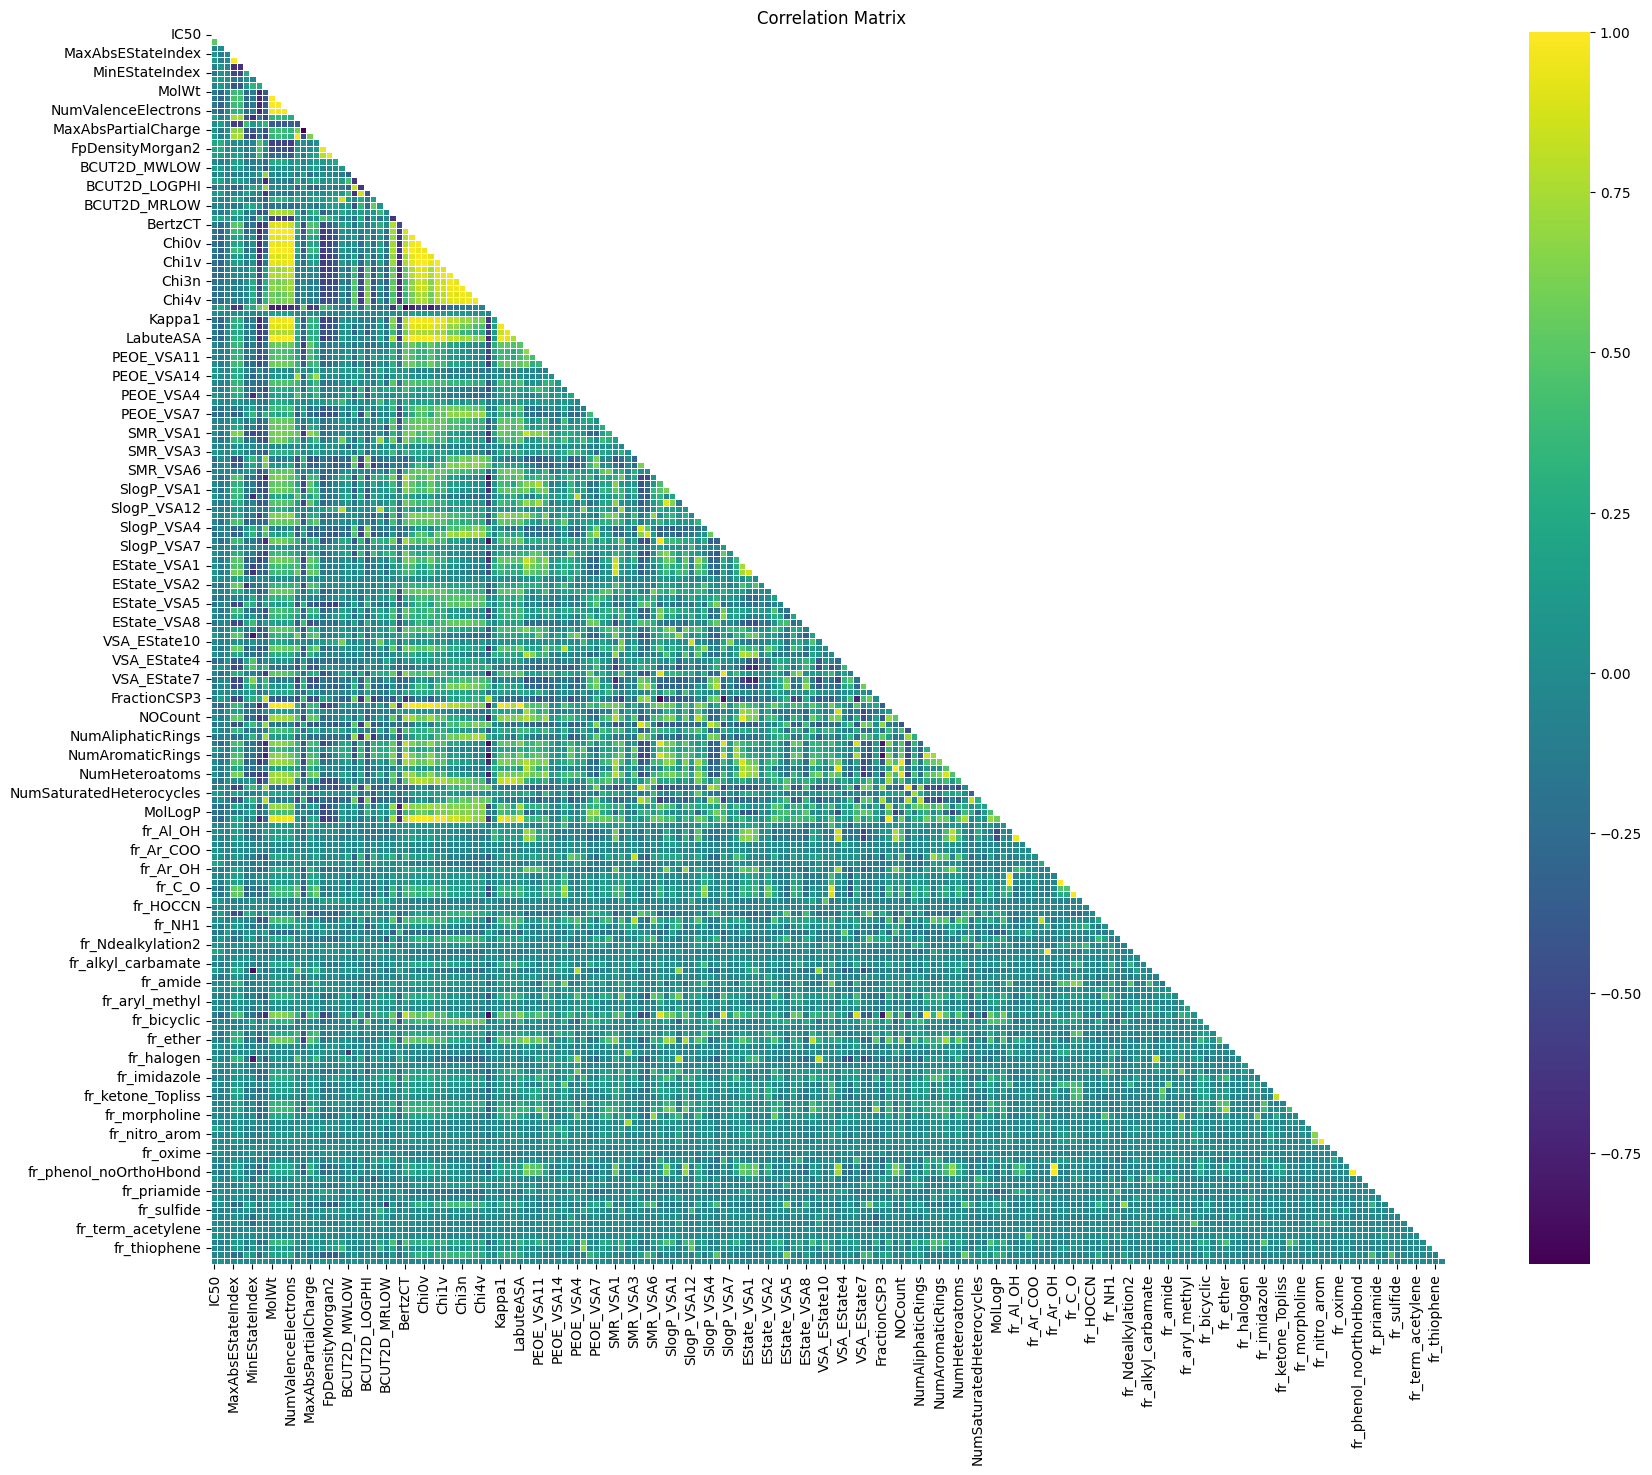

In [23]:
def plot_correlation_matrix(df, figsize=(20, 16), cmap='coolwarm', linewidths=0.5):
    """
    Функция для построения тепловой карты корреляционной матрицы.
    
    Parameters:
        df (DataFrame): DataFrame с данными для анализа.
        figsize (tuple): Размер фигуры для построения графика.
        cmap (str): Колormap для визуализации.
        linewidths (float): Ширина линий между ячейками.
    """
    # Вычисляем корреляционную матрицу для числовых данных
    corr_matrix = df.select_dtypes(include=[np.number]).corr()

    # Построение тепловой карты
    plt.figure(figsize=figsize)
    sns.heatmap(corr_matrix,
                 annot=False,
                 cmap='viridis',
                 linewidths=linewidths,
                 mask=np.triu(np.ones_like(corr_matrix, dtype=bool)))
                 
    plt.title('Correlation Matrix')
    plt.show()

# Пример использования функции
if __name__ == '__main__':
    plot_correlation_matrix(df)

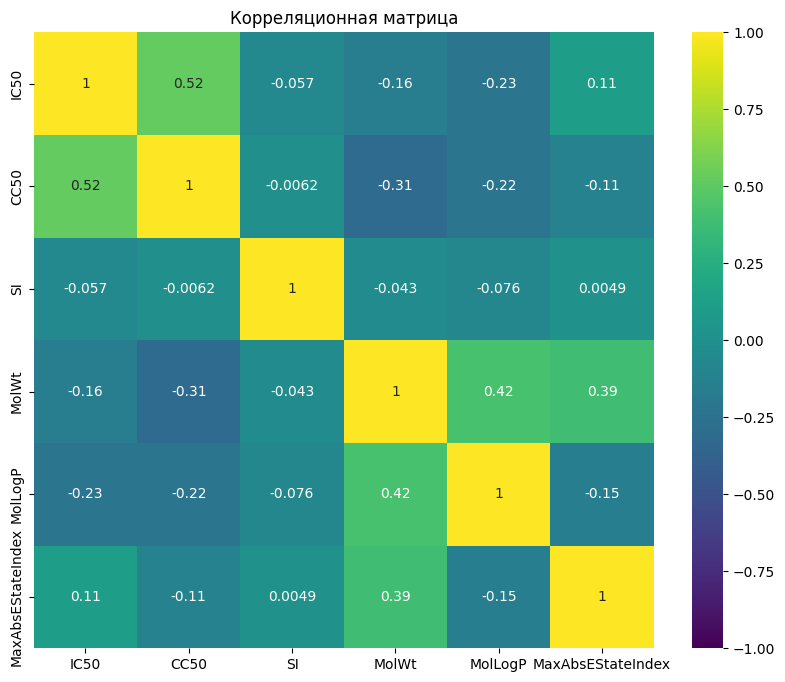

In [24]:
def plot_key_features_correlation_matrix(df, columns, figsize=(10, 8), cmap='coolwarm'):
    """
    Функция для построения корреляционной матрицы для заданных ключевых признаков.

    Parameters:
        df (DataFrame): DataFrame с данными для анализа.
        columns (list): Список имен столбцов, для которых будет вычислена корреляция.
        figsize (tuple): Размер фигуры для построения графика.
        cmap (str): Колormap для визуализации.
    """
    # Вычисление корреляционной матрицы для указанных признаков
    corr_matrix = df[columns].corr()

    # Построение тепловой карты корреляционной матрицы
    plt.figure(figsize=figsize)
    sns.heatmap(corr_matrix, annot=True, cmap='viridis', vmin=-1, vmax=1)
    
    plt.title('Корреляционная матрица')
    plt.show()

# Пример использования функции
if __name__ == '__main__':
    # Список ключевых признаков для корреляции
    corr_columns = ['IC50', 'CC50', 'SI', 'MolWt', 'MolLogP', 'MaxAbsEStateIndex']
    
    plot_key_features_correlation_matrix(df, corr_columns)

- **Выводы:**

- Анализ мультиколлинеарности показывает высокие корреляции между несколькими признаками в данных.

- Сильная корреляция: Наиболее заметные пары признаков, такие как ExactMolWt и MolWt (0.999999), а также Chi1 и HeavyAtomCount (0.998742), указывают на то, что эти переменные практически линейно зависимы. Это может привести к проблемам в моделировании, так как мультиколлинеарность затрудняет оценку значимости отдельных признаков.

- **Сильная корреляция:**
- Наиболее заметные пары признаков, такие как ExactMolWt и MolWt (0.999999), а также Chi1 и HeavyAtomCount (0.998742), указывают на то, что эти переменные практически линейно зависимы. Это может привести к проблемам в моделировании, так как мультиколлинеарность затрудняет оценку значимости отдельных признаков.

In [25]:
# Список признаков для удаления
features_to_remove = [
    'HeavyAtomMolWt',
    'Chi0',
    'LabuteASA',
    'Chi0n'
]

# Удаление признаков из датафрейма
df = df.drop(columns=features_to_remove)

# Вывод оставшихся признаков
print("Оставшиеся признаки:")
print(df.columns.tolist())

Оставшиеся признаки:
['IC50', 'CC50', 'SI', 'MaxAbsEStateIndex', 'MaxEStateIndex', 'MinAbsEStateIndex', 'MinEStateIndex', 'qed', 'SPS', 'MolWt', 'ExactMolWt', 'NumValenceElectrons', 'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW', 'AvgIpc', 'BalabanJ', 'BertzCT', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA9', 'SlogP_VSA1', 'SlogP_VSA10', 'SlogP_VSA11', 'SlogP_VSA12', 'SlogP_VSA2'

In [26]:
# Вычисление основных статистик
def calculate_statistics(dataframe):
    stats = dataframe.describe().T  # Основные статистики
    # Добавление дополнительных метрик
    stats['median'] = dataframe.median(numeric_only=True)
    stats['skew'] = dataframe.skew(numeric_only=True)
    stats['kurtosis'] = dataframe.kurtosis(numeric_only=True)

    # Сортировка столбцов
    selected_columns = ['count', 'mean', 'median', 'std', 'min', '25%', '50%', '75%', 'max', 'skew', 'kurtosis']
    return stats[selected_columns]

# Генерация и отображение таблицы со статистиками
statistics_table = calculate_statistics(df)
display(statistics_table.style.background_gradient(cmap='viridis'))

In [27]:
# 1. Удаляем выбросы в IC50
df_filtered = df[df['IC50'] <= 1000]

# 2. Вычисляем медиану для IC50 без выбросов
median_ic50 = df_filtered['IC50'].median()

# 3. Заменяем выбросы в IC50
df.loc[df['IC50'] > 1000, 'IC50'] = median_ic50

# 4. Пересчитываем SI
df['SI'] = df['CC50'] / df['IC50']

# 5. Удаляем выбросы в SI
df_filtered_si = df[df['SI'] <= 1000]

# 6. Вычисляем медиану для SI без выбросов
median_si = df_filtered_si['SI'].median()

# 7. Заменяем выбросы в SI
df.loc[df['SI'] > 1000, 'SI'] = median_si

# Проверка результатов
print(df[['CC50', 'IC50', 'SI']].describe())

              CC50        IC50          SI
count   969.000000  969.000000  969.000000
mean    586.419908  142.135419   26.348869
std     633.624464  226.862399   75.004342
min       0.700808    0.003517    0.011489
25%      99.999345   12.515396    1.898734
50%     424.166213   39.253787    5.097928
75%     891.776925  146.800483   23.076923
max    4538.976189  985.642475  828.935484


In [28]:
df.head()

IC50        CC50         SI  MaxAbsEStateIndex  MaxEStateIndex  \
0    6.239374  175.482382  28.125000           5.094096        5.094096   
1    0.771831    5.402819   7.000000           3.961417        3.961417   
2  223.808778  161.142320   0.720000           2.627117        2.627117   
3    1.705624  107.855654  63.235294           5.097360        5.097360   
4  107.131532  139.270991   1.300000           5.150510        5.150510   

   MinAbsEStateIndex  MinEStateIndex       qed        SPS    MolWt  ...  \
0           0.387225        0.387225  0.417362  42.928571  384.652  ...   
1           0.533868        0.533868  0.462473  45.214286  388.684  ...   
2           0.543231        0.543231  0.260923  42.187500  446.808  ...   
3           0.390603        0.390603  0.377846  41.862069  398.679  ...   
4           0.270476        0.270476  0.429038  36.514286  466.713  ...   

   fr_quatN  fr_sulfide  fr_sulfonamd  fr_sulfone  fr_term_acetylene  \
0         0           0             0           0                  0   
1         0           0             0           0                  0   
2         2           0             0           0                  0   
3         0           0             0           0                  0   
4         0           0             0           0                  0   

   fr_tetrazole  fr_thiazole  fr_thiophene  fr_unbrch_alkane  fr_urea  
0             0            0             0                 3        0  
1             0            0             0                 3        0  
2             0            0             0                 3        0  
3             0            0             0                 4        0  
4             0            0             0                 0        0  

[5 rows x 191 columns]

# Анализ структуры данных и их предобработка

In [29]:
# Проверка на наличие пропусков
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


MaxPartialCharge       3
MinPartialCharge       3
MaxAbsPartialCharge    3
MinAbsPartialCharge    3
BCUT2D_MWHI            3
BCUT2D_MWLOW           3
BCUT2D_CHGHI           3
BCUT2D_CHGLO           3
BCUT2D_LOGPHI          3
BCUT2D_LOGPLOW         3
BCUT2D_MRHI            3
BCUT2D_MRLOW           3
dtype: int64


In [30]:
# Поиск строк с пропусками
rows_with_missing_values = df[df.isnull().any(axis=1)]

In [31]:
# Заполнение пустых значений медианой по каждому столбцу
df_filled = df.fillna(df.median())
missing_values_after = df_filled.isnull().sum()
print('После заполнения медианой:')
print(missing_values_after[missing_values_after > 0])

После заполнения медианой:
Series([], dtype: int64)


In [49]:
dtale.show(df)

In [33]:
df.isnull().sum().to_frame().T

IC50  CC50  SI  MaxAbsEStateIndex  MaxEStateIndex  MinAbsEStateIndex  \
0     0     0   0                  0               0                  0   

   MinEStateIndex  qed  SPS  MolWt  ...  fr_quatN  fr_sulfide  fr_sulfonamd  \
0               0    0    0      0  ...         0           0             0   

   fr_sulfone  fr_term_acetylene  fr_tetrazole  fr_thiazole  fr_thiophene  \
0           0                  0             0            0             0   

   fr_unbrch_alkane  fr_urea  
0                 0        0  

[1 rows x 191 columns]

In [34]:
column_names = df.columns.tolist()

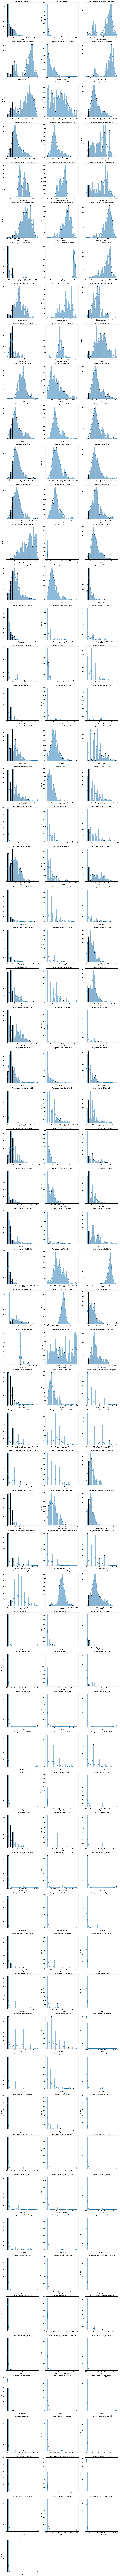

In [35]:
# Функция для построения гистограмм
def plot_histograms(df, column_names, num_columns=3):
    # Фильтрация числовых колонок
    columns_to_plot = [
        col for col in column_names[1:] 
        if df[col].dtype in ['float64', 'int64']
    ]

    num_rows = (len(columns_to_plot) - 1) // num_columns + 1  # Подсчёт количества строк
    plt.figure(figsize=(15, 5 * num_rows))

    for i, column in enumerate(columns_to_plot):
        plt.subplot(num_rows, num_columns, i + 1)
        sns.histplot(df[column], bins=30, kde=True)
        plt.title(f'Распределение {column}')
        plt.xlabel(column)
        plt.ylabel('Частота')

    plt.tight_layout()
    plt.show()

# Вызов функции
plot_histograms(df, column_names)

*тесты на нормальность распределения данных в заданных столбцах DataFrame с помощью библиотек SciPy:*

In [36]:
from scipy import stats

columns_to_plot = [col for col in column_names[1:] if df[col].dtype in ['float64', 'int64']]
def shapiro_test(data, column):
    """Функция для выполнения теста Шапиро-Уилка."""
    stat, p = stats.shapiro(data)
    return f'Тест Шапиро-Уилка для {column}: статистика={stat:.3f}, p-значение={p:.3f}'

def anderson_test(data, column):
    """Функция для выполнения теста Андерсона-Дарлина."""
    result = stats.anderson(data)
    result_strings = [f'Тест Андерсона-Дарлина для {column}: статистика={result.statistic:.3f}']
    for sl, cv in zip(result.significance_level, result.critical_values):
        result_strings.append(f'  Уровень значимости {sl}%: критическое значение {cv:.3f}')
    return "\n".join(result_strings)

def perform_normality_tests(dataframe, columns):
    for column in columns:
        data = dataframe[column].dropna()
        unique_values = dataframe[column].nunique()

        # Тест Шапиро-Уилка
        if len(data) < 3:
            print(f'{column}: Недостаточно данных (<3) для теста Шапиро-Уилка.')
        elif unique_values <= 1:
            print(f'{column}: Только одно уникальное значение, тест Шапиро-Уилка не применим.')
        else:
            try:
                print(shapiro_test(data, column))
            except Exception as e:
                print(f'Ошибка при тестировании {column}: {e}')

    print("\n--- Тест Андерсона-Дарлина ---")
    for column in columns:
        data = dataframe[column].dropna()
        unique_values = dataframe[column].nunique()

        # Тест Андерсона-Дарлина
        if len(data) < 8:
            print(f'{column}: Недостаточно данных (<8) для теста Андерсона-Дарлина.')
        elif unique_values <= 1:
            print(f'{column}: Только одно уникальное значение, тест Андерсона-Дарлина не применим.')
        else:
            print(anderson_test(data, column))

# Вызов функции со списком колонок
print(perform_normality_tests(df, columns_to_plot))

Тест Шапиро-Уилка для CC50: статистика=0.809, p-значение=0.000
Тест Шапиро-Уилка для SI: статистика=0.330, p-значение=0.000
Тест Шапиро-Уилка для MaxAbsEStateIndex: статистика=0.841, p-значение=0.000
Тест Шапиро-Уилка для MaxEStateIndex: статистика=0.841, p-значение=0.000
Тест Шапиро-Уилка для MinAbsEStateIndex: статистика=0.856, p-значение=0.000
Тест Шапиро-Уилка для MinEStateIndex: статистика=0.787, p-значение=0.000
Тест Шапиро-Уилка для qed: статистика=0.931, p-значение=0.000
Тест Шапиро-Уилка для SPS: статистика=0.966, p-значение=0.000
Тест Шапиро-Уилка для MolWt: статистика=0.930, p-значение=0.000
Тест Шапиро-Уилка для ExactMolWt: статистика=0.930, p-значение=0.000
Тест Шапиро-Уилка для NumValenceElectrons: статистика=0.919, p-значение=0.000
Тест Шапиро-Уилка для MaxPartialCharge: статистика=0.958, p-значение=0.000
Тест Шапиро-Уилка для MinPartialCharge: статистика=0.929, p-значение=0.000
Тест Шапиро-Уилка для MaxAbsPartialCharge: статистика=0.934, p-значение=0.000
Тест Шапиро-Уил

*статистические тесты, на нормальность распределения для ['CC50', 'IC50', 'SI']:*

In [37]:
from scipy import stats

# Колонки, которые нужно протестировать на нормальность
columns_to_test = ['CC50', 'IC50', 'SI']

def shapiro_test(data, column):
    """Функция для выполнения теста Шапиро-Уилка.
    
    Аргументы:
    data -- массив значений
    column -- название колонки
    
    Возвращает: Отчет о тесте.
    """
    stat, p = stats.shapiro(data)
    return f'Тест Шапиро-Уилка для {column}: статистика={stat:.3f}, p-значение={p:.3f}'

def anderson_test(data, column):
    """Функция для выполнения теста Андерсона-Дарлина.
    
    Аргументы:
    data -- массив значений
    column -- название колонки
    
    Возвращает: Отчет о тесте.
    """
    result = stats.anderson(data)
    result_strings = [f'Тест Андерсона-Дарлина для {column}: статистика={result.statistic:.3f}']
    for sl, cv in zip(result.significance_level, result.critical_values):
        result_strings.append(f'  Уровень значимости {sl}%: критическое значение {cv:.3f}')
    return "\n".join(result_strings)

def perform_normality_tests(dataframe, columns):
    """Функция для проверки нормальности распределения.
    
    Аргументы:
    dataframe -- DataFrame с данными
    columns -- список колонок для тестирования
    """
    for column in columns:
        data = dataframe[column].dropna()
        unique_values = dataframe[column].nunique()

        # Тест Шапиро-Уилка
        if len(data) < 3:
            print(f'{column}: Недостаточно данных (<3) для теста Шапиро-Уилка.')
        elif unique_values <= 1:
            print(f'{column}: Только одно уникальное значение, тест Шапиро-Уилка не применим.')
        else:
            try:
                print(shapiro_test(data, column))
            except Exception as e:
                print(f'Ошибка при тестировании {column}: {e}')

    print("\n--- Тест Андерсона-Дарлина ---")
    for column in columns:
        data = dataframe[column].dropna()
        unique_values = dataframe[column].nunique()

        # Тест Андерсона-Дарлина
        if len(data) < 8:
            print(f'{column}: Недостаточно данных (<8) для теста Андерсона-Дарлина.')
        elif unique_values <= 1:
            print(f'{column}: Только одно уникальное значение, тест Андерсона-Дарлина не применим.')
        else:
            print(anderson_test(data, column))

# Вызов функции для тестирования указанных колонок
perform_normality_tests(df, columns_to_test)


Тест Шапиро-Уилка для CC50: статистика=0.809, p-значение=0.000
Тест Шапиро-Уилка для IC50: статистика=0.642, p-значение=0.000
Тест Шапиро-Уилка для SI: статистика=0.330, p-значение=0.000

--- Тест Андерсона-Дарлина ---
Тест Андерсона-Дарлина для CC50: статистика=42.665
  Уровень значимости 15.0%: критическое значение 0.574
  Уровень значимости 10.0%: критическое значение 0.653
  Уровень значимости 5.0%: критическое значение 0.784
  Уровень значимости 2.5%: критическое значение 0.914
  Уровень значимости 1.0%: критическое значение 1.088
Тест Андерсона-Дарлина для IC50: статистика=134.582
  Уровень значимости 15.0%: критическое значение 0.574
  Уровень значимости 10.0%: критическое значение 0.653
  Уровень значимости 5.0%: критическое значение 0.784
  Уровень значимости 2.5%: критическое значение 0.914
  Уровень значимости 1.0%: критическое значение 1.088
Тест Андерсона-Дарлина для SI: статистика=206.889
  Уровень значимости 15.0%: критическое значение 0.574
  Уровень значимости 10.0%: к

*графическая визуализация только для ['CC50', 'IC50', 'SI']:*

Тест Шапиро-Уилка для CC50: статистика=0.809, p-значение=0.000


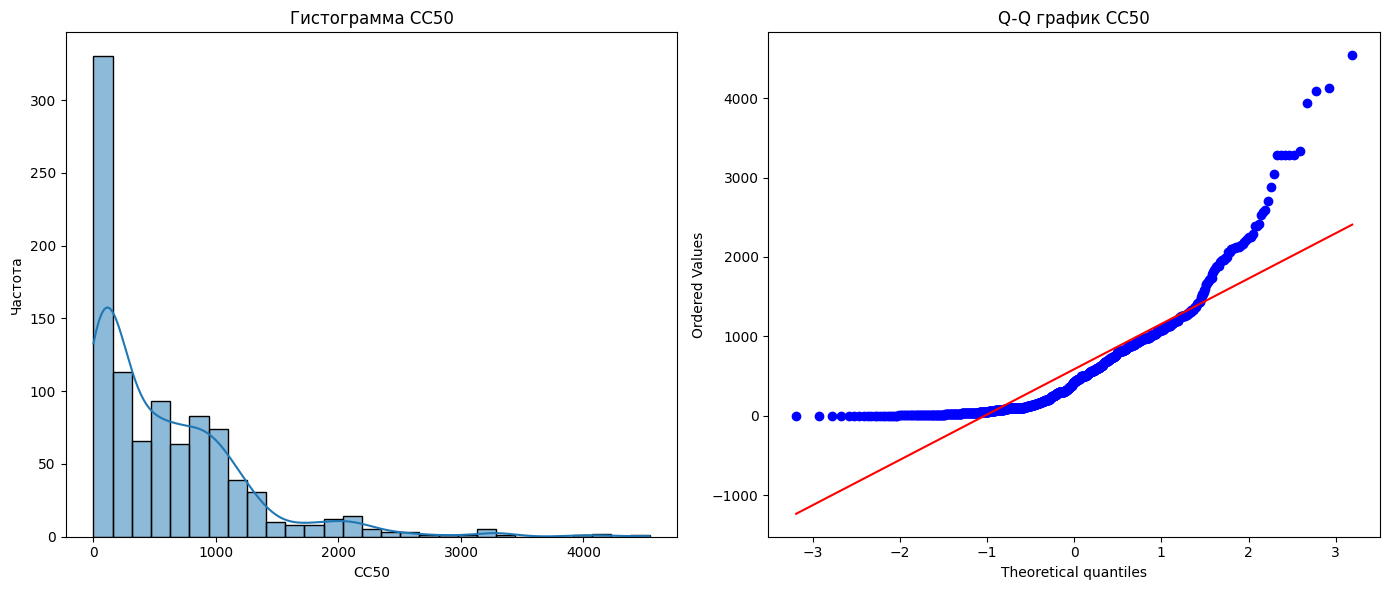

Тест Шапиро-Уилка для IC50: статистика=0.642, p-значение=0.000


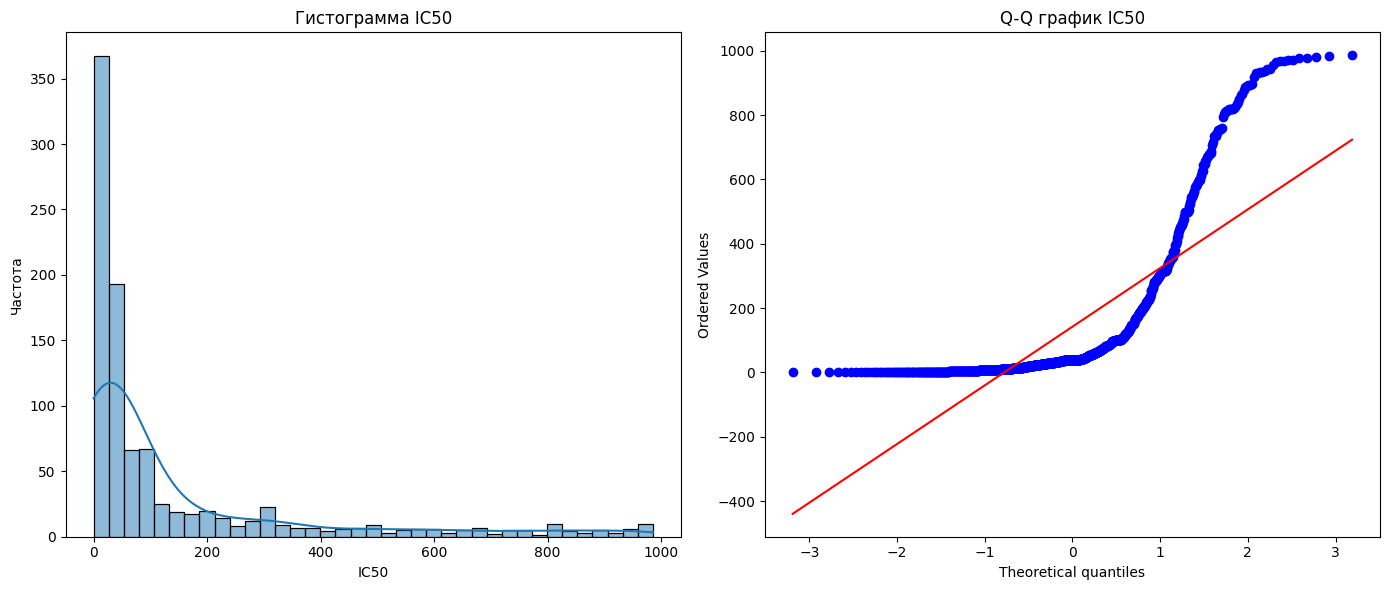

Тест Шапиро-Уилка для SI: статистика=0.330, p-значение=0.000


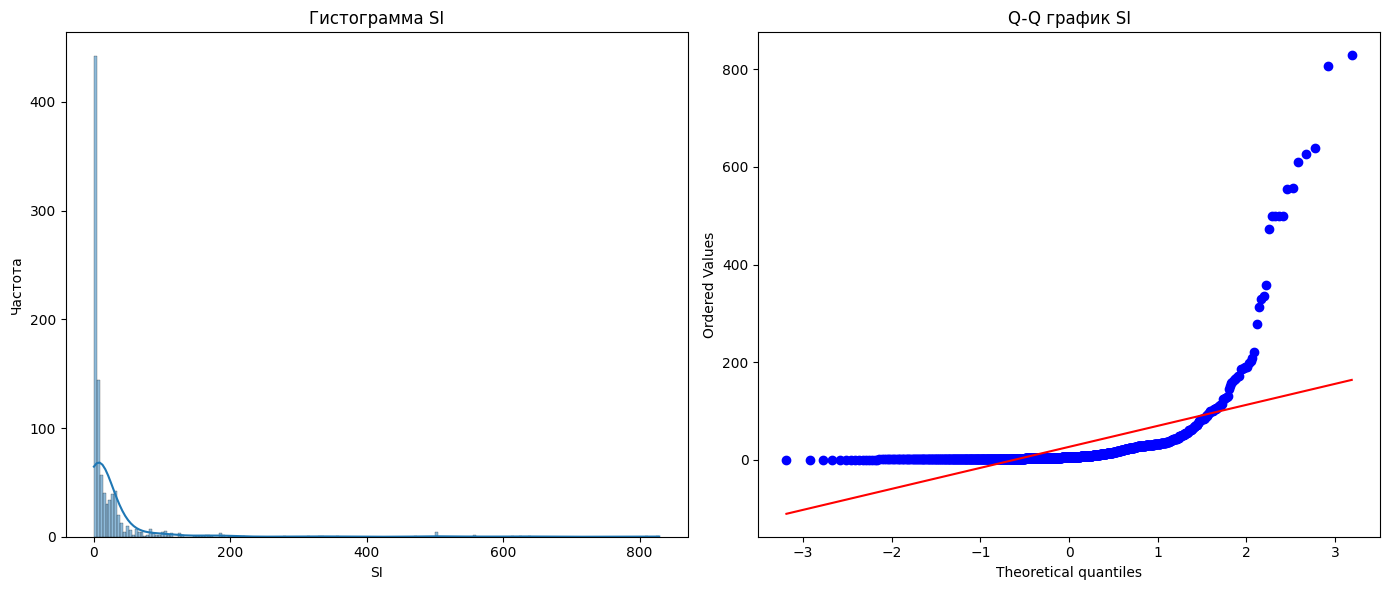


--- Тест Андерсона-Дарлина ---
Тест Андерсона-Дарлина для CC50: статистика=42.665
  Уровень значимости 15%: критическое значение 0.574
  Уровень значимости 30%: критическое значение 0.653
  Уровень значимости 45%: критическое значение 0.784
  Уровень значимости 60%: критическое значение 0.914
  Уровень значимости 75%: критическое значение 1.088


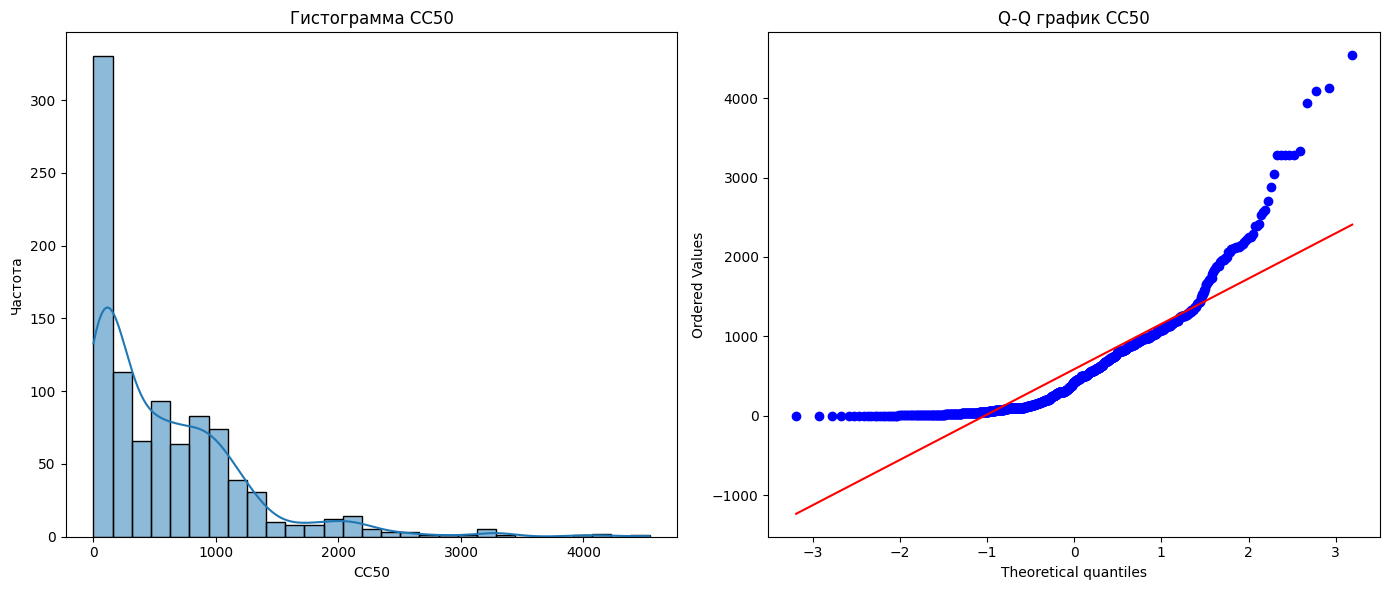

Тест Андерсона-Дарлина для IC50: статистика=134.582
  Уровень значимости 15%: критическое значение 0.574
  Уровень значимости 30%: критическое значение 0.653
  Уровень значимости 45%: критическое значение 0.784
  Уровень значимости 60%: критическое значение 0.914
  Уровень значимости 75%: критическое значение 1.088


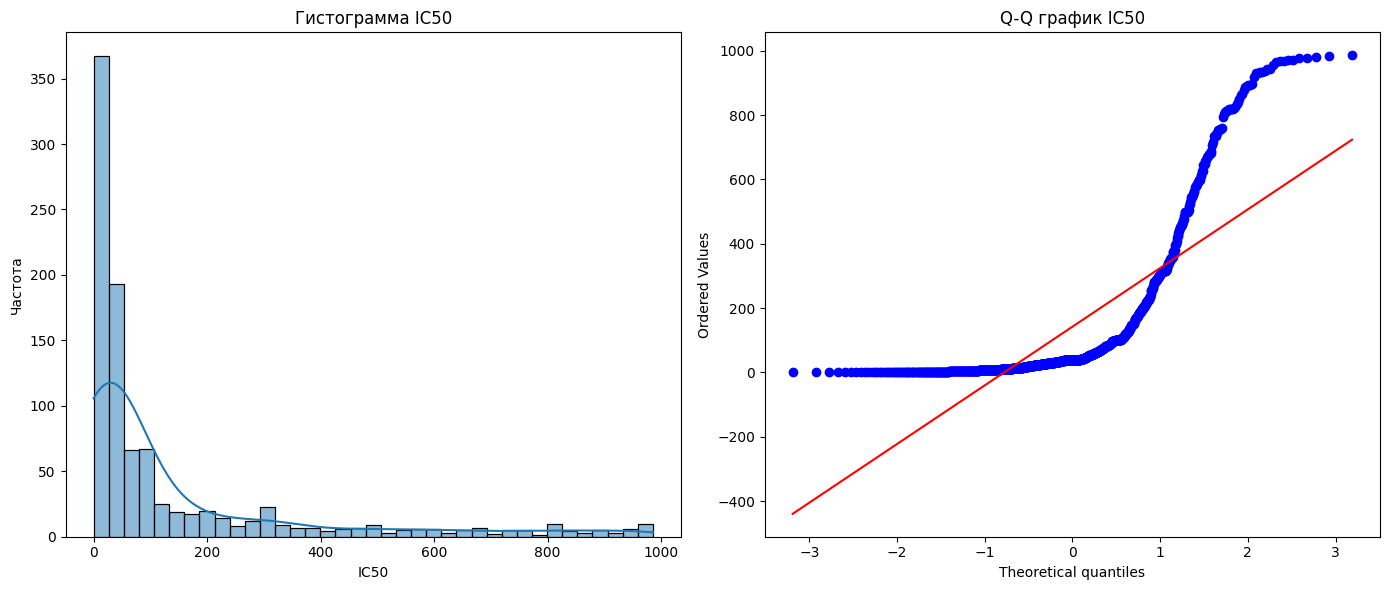

Тест Андерсона-Дарлина для SI: статистика=206.889
  Уровень значимости 15%: критическое значение 0.574
  Уровень значимости 30%: критическое значение 0.653
  Уровень значимости 45%: критическое значение 0.784
  Уровень значимости 60%: критическое значение 0.914
  Уровень значимости 75%: критическое значение 1.088


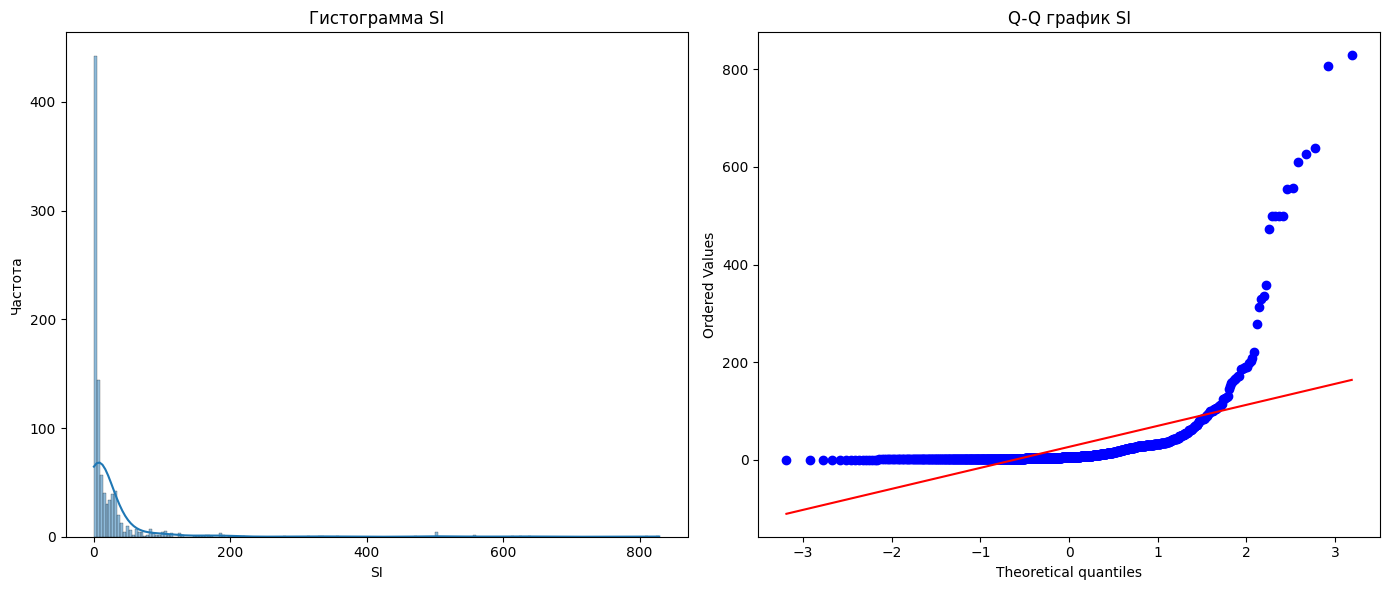

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Предполагается, что df — ваш DataFrame
columns_to_test = ['CC50', 'IC50', 'SI']

def shapiro_test(data, column):
    """Функция для выполнения теста Шапиро-Уилка."""
    stat, p = stats.shapiro(data)
    return stat, p

def anderson_test(data, column):
    """Функция для выполнения теста Андерсона-Дарлина."""
    result = stats.anderson(data)
    return result.statistic, result.critical_values

def plot_results(dataframe, column):
    """Функция для построения графиков: гистограмма и Q-Q график."""
    data = dataframe[column].dropna()
    
    # Гистограмма
    plt.figure(figsize=(14, 6))
    
    plt.subplot(1, 2, 1)
    sns.histplot(data, kde=True)
    plt.title(f'Гистограмма {column}')
    plt.xlabel(column)
    plt.ylabel('Частота')
    
    # Q-Q график
    plt.subplot(1, 2, 2)
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f'Q-Q график {column}')
    
    plt.tight_layout()
    plt.show()

def perform_normality_tests(dataframe, columns):
    for column in columns:
        data = dataframe[column].dropna()
        unique_values = dataframe[column].nunique()

        # Тест Шапиро-Уилка
        if len(data) < 3:
            print(f'{column}: Недостаточно данных (<3) для теста Шапиро-Уилка.')
        elif unique_values <= 1:
            print(f'{column}: Только одно уникальное значение, тест Шапиро-Уилка не применим.')
        else:
            try:
                stat, p = shapiro_test(data, column)
                print(f'Тест Шапиро-Уилка для {column}: статистика={stat:.3f}, p-значение={p:.3f}')
                plot_results(dataframe, column)  # Построение графиков
            except Exception as e:
                print(f'Ошибка при тестировании {column}: {e}')

    print("\n--- Тест Андерсона-Дарлина ---")
    for column in columns:
        data = dataframe[column].dropna()
        unique_values = dataframe[column].nunique()

        # Тест Андерсона-Дарлина
        if len(data) < 8:
            print(f'{column}: Недостаточно данных (<8) для теста Андерсона-Дарлина.')
        elif unique_values <= 1:
            print(f'{column}: Только одно уникальное значение, тест Андерсона-Дарлина не применим.')
        else:
            stat, critical_values = anderson_test(data, column)
            print(f'Тест Андерсона-Дарлина для {column}: статистика={stat:.3f}')
            for sl, cv in zip(range(len(critical_values)), critical_values):
                sl_level = (sl + 1) * 15  # Уровень значимости
                print(f'  Уровень значимости {sl_level}%: критическое значение {cv:.3f}')
            plot_results(dataframe, column)  # Построение графиков

# Вызов функции для тестирования указанных колонок
perform_normality_tests(df, columns_to_test)


*Тест Шапиро-Уилка используется для проверки нормально ли распределены данные. В ваших результатах указаны статистики тестов и соответствующие p-значения для трёх наборов данных: CC50, IC50 и SI.*

- Вот основные выводы:

- *CC50:*
- Статистика = 0.809
- p-значение = 0.000
- Интерпретация: p-значение значительно меньше 0.05, что указывает на отклонение от нормальности распределения данных CC50.
- *IC50:*
- Статистика = 0.642
- p-значение = 0.000
- Интерпретация: p-значение также значительно меньше 0.05, что говорит о том, что данные IC50 не распределены нормально.
- *SI:*
- Статистика = 0.330
- p-значение = 0.000
- Интерпретация: Как и в предыдущих случаях, p-значение несколько меньше 0.05 указывает на отклонение от нормальности для данных SI.
- Общий вывод:
- Для всех трёх наборов данных (CC50, IC50 и SI) тест Шапиро-Уилка показывает, что данные не являются нормально распределёнными. 

*Тест Андерсона-Дарлина (Anderson-Darling test) служит для проверки гипотезы о том, что данные следуют определённому распределению, и предоставляет статистику теста, которую можно сравнить с критическими значениями для различных уровней значимости.*

- Вот интерпретация ваших результатов:

- Результаты теста:
- *CC50:*
- Статистика = 42.665
- Критические значения:
- 15.0%: 0.574
- 10.0%: 0.653
- 5.0%: 0.784
- 2.5%: 0.914
- 1.0%: 1.088
- Вывод: Статистика теста (42.665) значительно превышает максимальное критическое значение (1.088 при уровне значимости 1.0%). Это указывает на наличие отклонения от нормального распределения.

- *IC50:*
- Статистика = 134.582
- Критические значения:
- 15.0%: 0.574
- 10.0%: 0.653
- 5.0%: 0.784
- 2.5%: 0.914
- 1.0%: 1.088
- Вывод: Статистика теста (134.582) также значительно превышает все критические значения, что свидетельствует о том, что данные IC50 не распределены нормально.

- *SI:*
- Статистика = 206.889
- Критические значения:
- 15.0%: 0.574
- 10.0%: 0.653
- 5.0%: 0.784
- 2.5%: 0.914
- 1.0%: 1.088
- Вывод: Статистика теста (206.889) вновь значительно превышает все критические значения, что указывает на применение ненормального распределения данных SI.

- *Общий вывод:*
Для всех трёх наборов данных (CC50, IC50 и SI) результаты теста Андерсона-Дарлина подтверждают выводы теста Шапиро-Уилка и показывают, что данные не распределены нормально.

In [39]:
# признаки с низкой вариативностью  для удаления
remove_features = [
    'SMR_VSA2',    #
    'SlogP_VSA7',  #
    'EState_VSA11' #
]
# Удаление признаков из датафрейма
df = df.drop(columns=remove_features)

# Проверка результата
print("Оставшиеся признаки:", df.columns.tolist())

Оставшиеся признаки: ['IC50', 'CC50', 'SI', 'MaxAbsEStateIndex', 'MaxEStateIndex', 'MinAbsEStateIndex', 'MinEStateIndex', 'qed', 'SPS', 'MolWt', 'ExactMolWt', 'NumValenceElectrons', 'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW', 'AvgIpc', 'BalabanJ', 'BertzCT', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA9', 'SlogP_VSA1', 'SlogP_VSA10', 'SlogP_VSA11', 'SlogP_VSA12', 'SlogP_VSA2', 'SlogP_VSA

In [40]:
# Проверка на количество строк перед удалением
print("Количество строк до удаления NaN:", df.shape[0])

Количество строк до удаления NaN: 969


In [41]:
# Проверка на количество NaN значений
na_count = df.isnull().sum()
print("Количество NaN значений по столбцам:")
print(na_count[na_count > 0])

Количество NaN значений по столбцам:
MaxPartialCharge       3
MinPartialCharge       3
MaxAbsPartialCharge    3
MinAbsPartialCharge    3
BCUT2D_MWHI            3
BCUT2D_MWLOW           3
BCUT2D_CHGHI           3
BCUT2D_CHGLO           3
BCUT2D_LOGPHI          3
BCUT2D_LOGPLOW         3
BCUT2D_MRHI            3
BCUT2D_MRLOW           3
dtype: int64


In [42]:
# Заполнение NaN значений медианным значением по каждому столбце
df.fillna(df.mean(), inplace=True)

# Проверка на наличие NaN значений после обработки
print("Количество NaN значений после обработки:")
print(df.isnull().sum())

Количество NaN значений после обработки:
IC50                 0
CC50                 0
SI                   0
MaxAbsEStateIndex    0
MaxEStateIndex       0
                    ..
fr_tetrazole         0
fr_thiazole          0
fr_thiophene         0
fr_unbrch_alkane     0
fr_urea              0
Length: 188, dtype: int64


In [43]:
df.head()

IC50        CC50         SI  MaxAbsEStateIndex  MaxEStateIndex  \
0    6.239374  175.482382  28.125000           5.094096        5.094096   
1    0.771831    5.402819   7.000000           3.961417        3.961417   
2  223.808778  161.142320   0.720000           2.627117        2.627117   
3    1.705624  107.855654  63.235294           5.097360        5.097360   
4  107.131532  139.270991   1.300000           5.150510        5.150510   

   MinAbsEStateIndex  MinEStateIndex       qed        SPS    MolWt  ...  \
0           0.387225        0.387225  0.417362  42.928571  384.652  ...   
1           0.533868        0.533868  0.462473  45.214286  388.684  ...   
2           0.543231        0.543231  0.260923  42.187500  446.808  ...   
3           0.390603        0.390603  0.377846  41.862069  398.679  ...   
4           0.270476        0.270476  0.429038  36.514286  466.713  ...   

   fr_quatN  fr_sulfide  fr_sulfonamd  fr_sulfone  fr_term_acetylene  \
0         0           0             0           0                  0   
1         0           0             0           0                  0   
2         2           0             0           0                  0   
3         0           0             0           0                  0   
4         0           0             0           0                  0   

   fr_tetrazole  fr_thiazole  fr_thiophene  fr_unbrch_alkane  fr_urea  
0             0            0             0                 3        0  
1             0            0             0                 3        0  
2             0            0             0                 3        0  
3             0            0             0                 4        0  
4             0            0             0                 0        0  

[5 rows x 188 columns]

In [ ]:
# Стандартизация позволяет улучшить точность многих алгоритмов машинного обучения,
# так как они лучше работают, когда все признаки имеют сопоставимые масштабы.

In [44]:
scaler = StandardScaler()

# Применяем StandardScaler к данным
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Выводим первые 5 строк отцентрированных данных
print(df_scaled.head())

       IC50      CC50        SI  MaxAbsEStateIndex  MaxEStateIndex  \
0 -0.599333 -0.648886  0.023693          -1.766931       -1.766931   
1 -0.623447 -0.917447 -0.258103          -2.112017       -2.112017   
2  0.360199 -0.671529 -0.341875          -2.518530       -2.518530   
3 -0.619328 -0.755671  0.492044          -1.765937       -1.765937   
4 -0.154375 -0.706065 -0.334138          -1.749744       -1.749744   

   MinAbsEStateIndex  MinEStateIndex       qed       SPS     MolWt  ...  \
0           1.230105        0.859969 -0.751719  1.076111  0.260487  ...   
1           2.098636        0.953566 -0.540135  1.257528  0.292155  ...   
2           2.154087        0.959542 -1.485466  1.017293  0.748665  ...   
3           1.250111        0.862125 -0.937063  0.991464  0.370656  ...   
4           0.538633        0.785453 -0.696952  0.567012  0.905000  ...   

   fr_quatN  fr_sulfide  fr_sulfonamd  fr_sulfone  fr_term_acetylene  \
0 -0.179370   -0.211946     -0.111979   -0.096825       

In [45]:
df_scaled.shape

(969, 188)

In [46]:
df_scaled.head()

IC50      CC50        SI  MaxAbsEStateIndex  MaxEStateIndex  \
0 -0.599333 -0.648886  0.023693          -1.766931       -1.766931   
1 -0.623447 -0.917447 -0.258103          -2.112017       -2.112017   
2  0.360199 -0.671529 -0.341875          -2.518530       -2.518530   
3 -0.619328 -0.755671  0.492044          -1.765937       -1.765937   
4 -0.154375 -0.706065 -0.334138          -1.749744       -1.749744   

   MinAbsEStateIndex  MinEStateIndex       qed       SPS     MolWt  ...  \
0           1.230105        0.859969 -0.751719  1.076111  0.260487  ...   
1           2.098636        0.953566 -0.540135  1.257528  0.292155  ...   
2           2.154087        0.959542 -1.485466  1.017293  0.748665  ...   
3           1.250111        0.862125 -0.937063  0.991464  0.370656  ...   
4           0.538633        0.785453 -0.696952  0.567012  0.905000  ...   

   fr_quatN  fr_sulfide  fr_sulfonamd  fr_sulfone  fr_term_acetylene  \
0 -0.179370   -0.211946     -0.111979   -0.096825          -0.032141   
1 -0.179370   -0.211946     -0.111979   -0.096825          -0.032141   
2  6.379466   -0.211946     -0.111979   -0.096825          -0.032141   
3 -0.179370   -0.211946     -0.111979   -0.096825          -0.032141   
4 -0.179370   -0.211946     -0.111979   -0.096825          -0.032141   

   fr_tetrazole  fr_thiazole  fr_thiophene  fr_unbrch_alkane   fr_urea  
0     -0.032141    -0.238132     -0.274721          2.268081 -0.085302  
1     -0.032141    -0.238132     -0.274721          2.268081 -0.085302  
2     -0.032141    -0.238132     -0.274721          2.268081 -0.085302  
3     -0.032141    -0.238132     -0.274721          3.080565 -0.085302  
4     -0.032141    -0.238132     -0.274721         -0.169372 -0.085302  

[5 rows x 188 columns]

In [47]:
df_scaled.shape

(969, 188)

In [48]:
# Сохранить df_scaled в CSV файл
df_scaled.to_csv('df_scaled.csv', index=False)